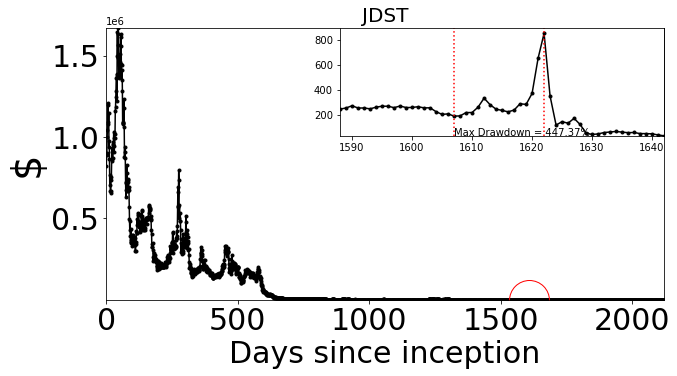

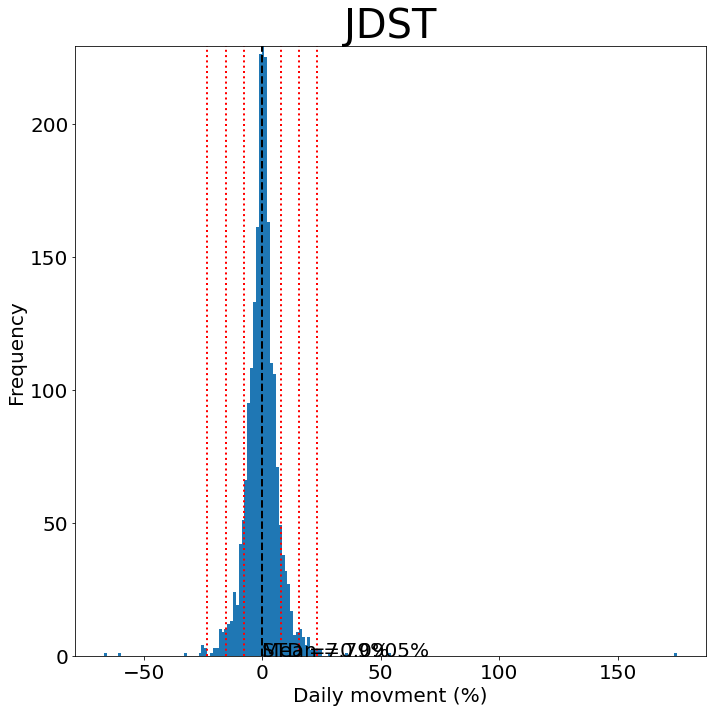

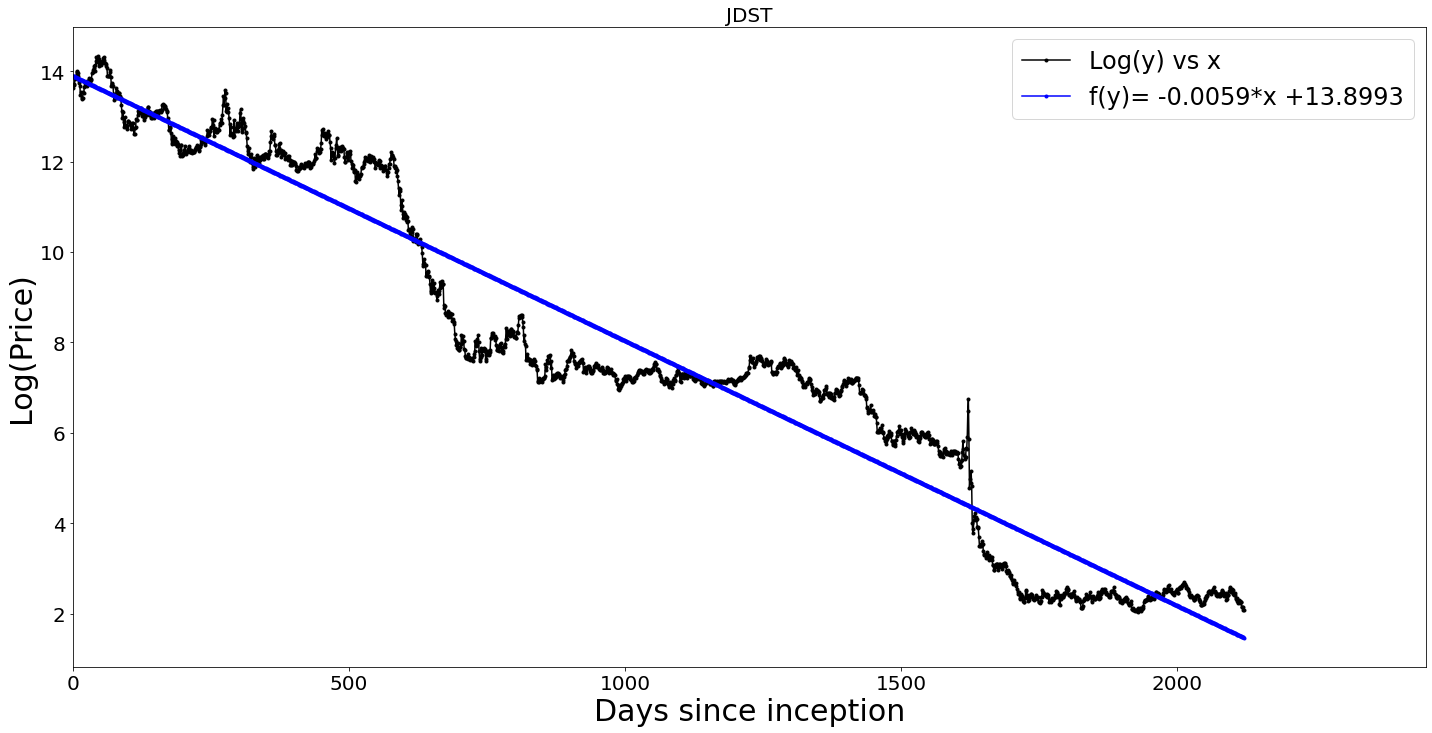

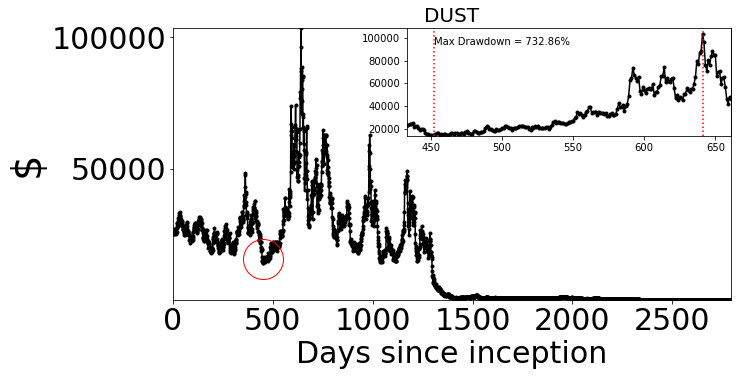

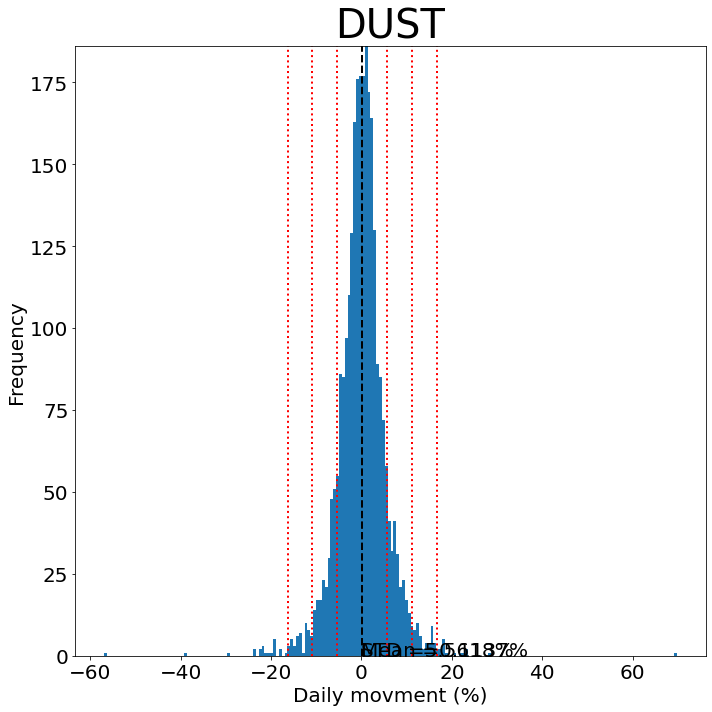

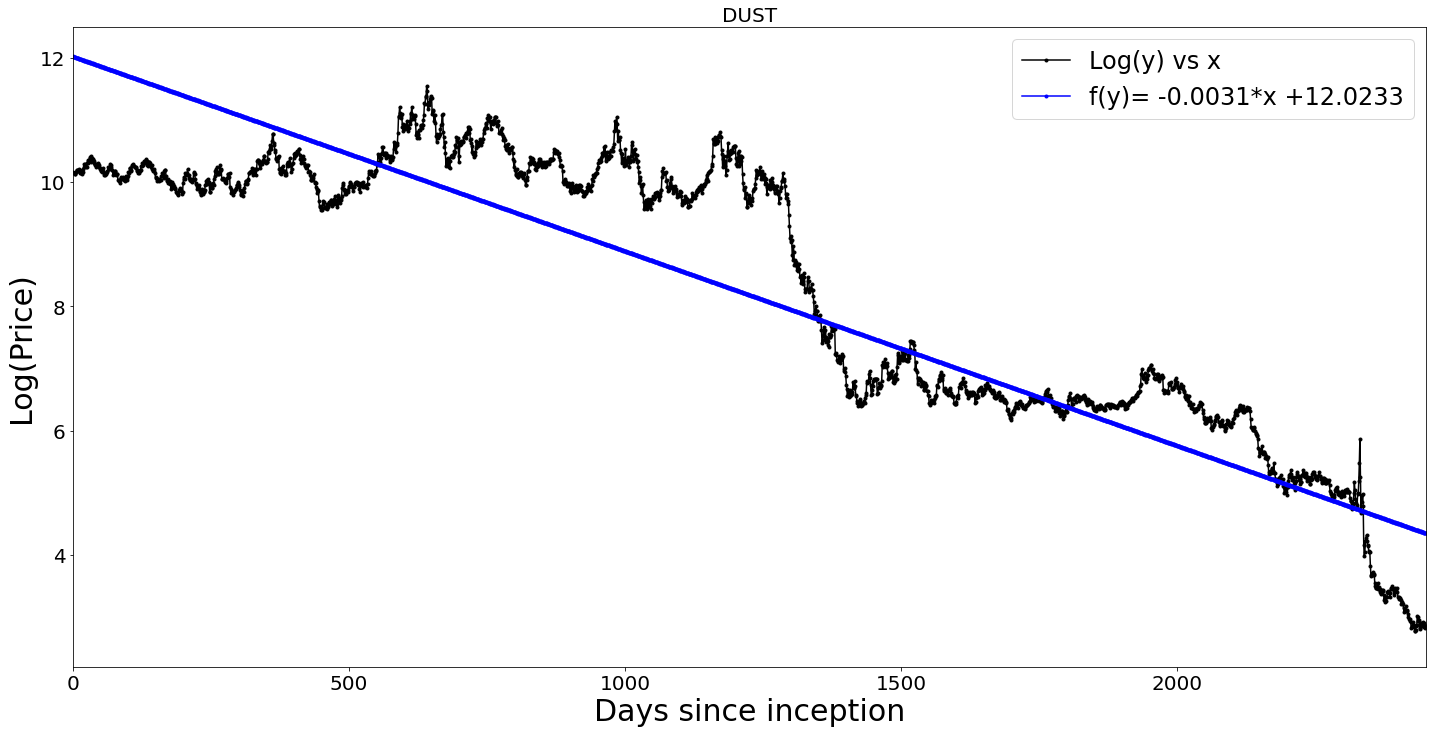

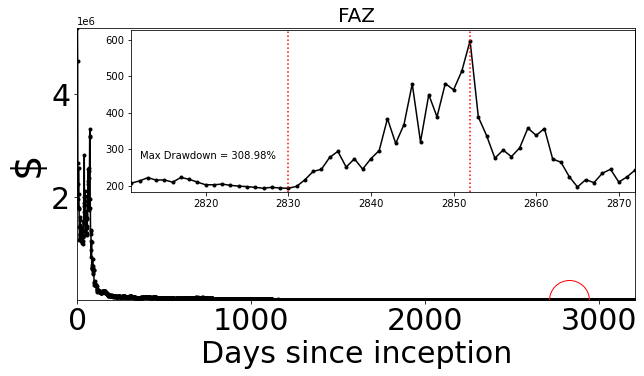

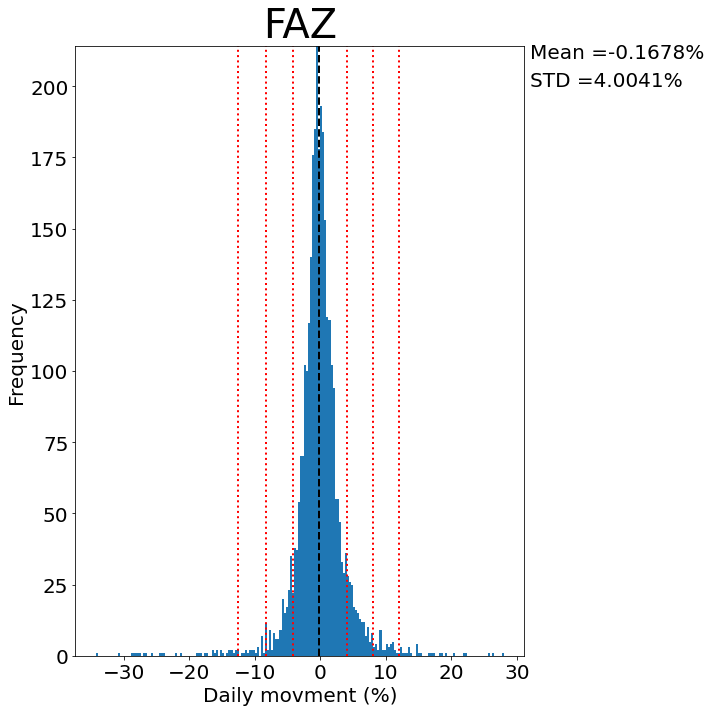

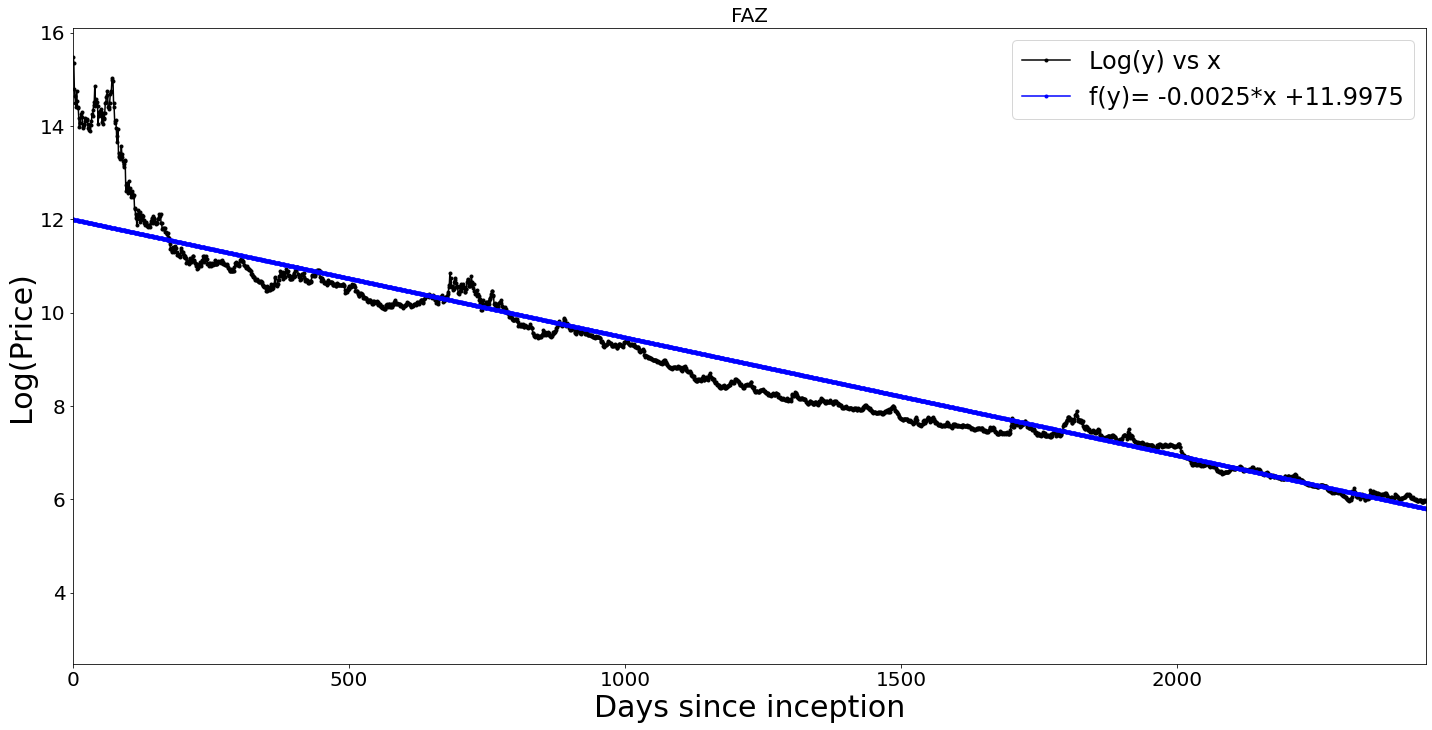

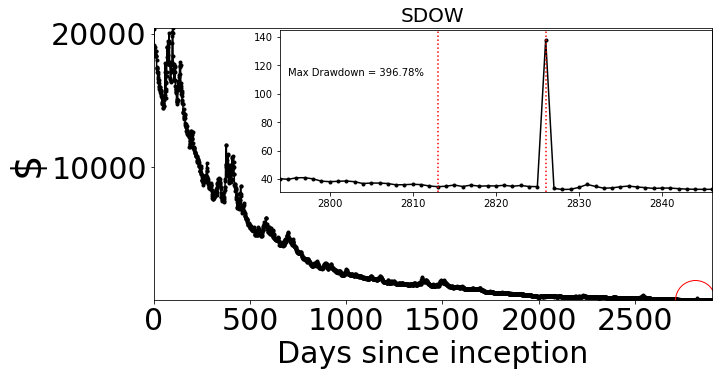

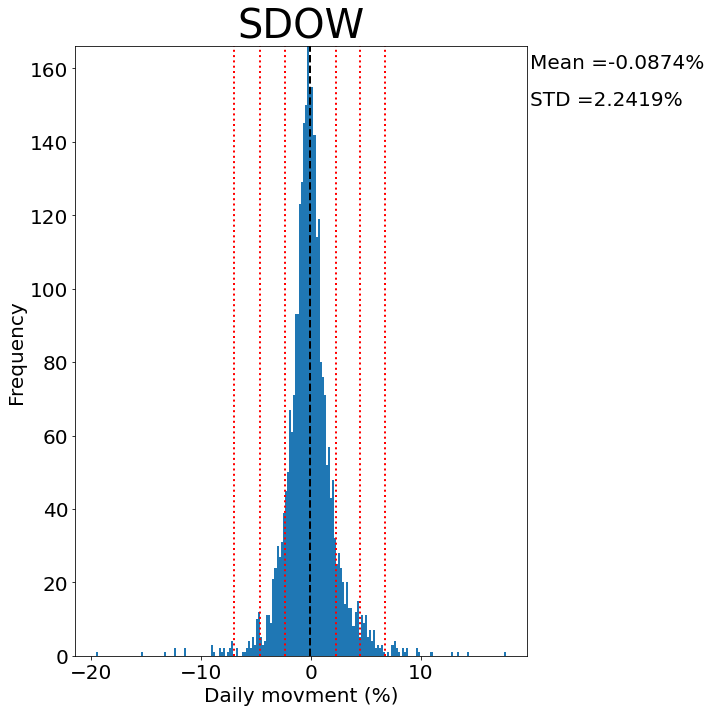

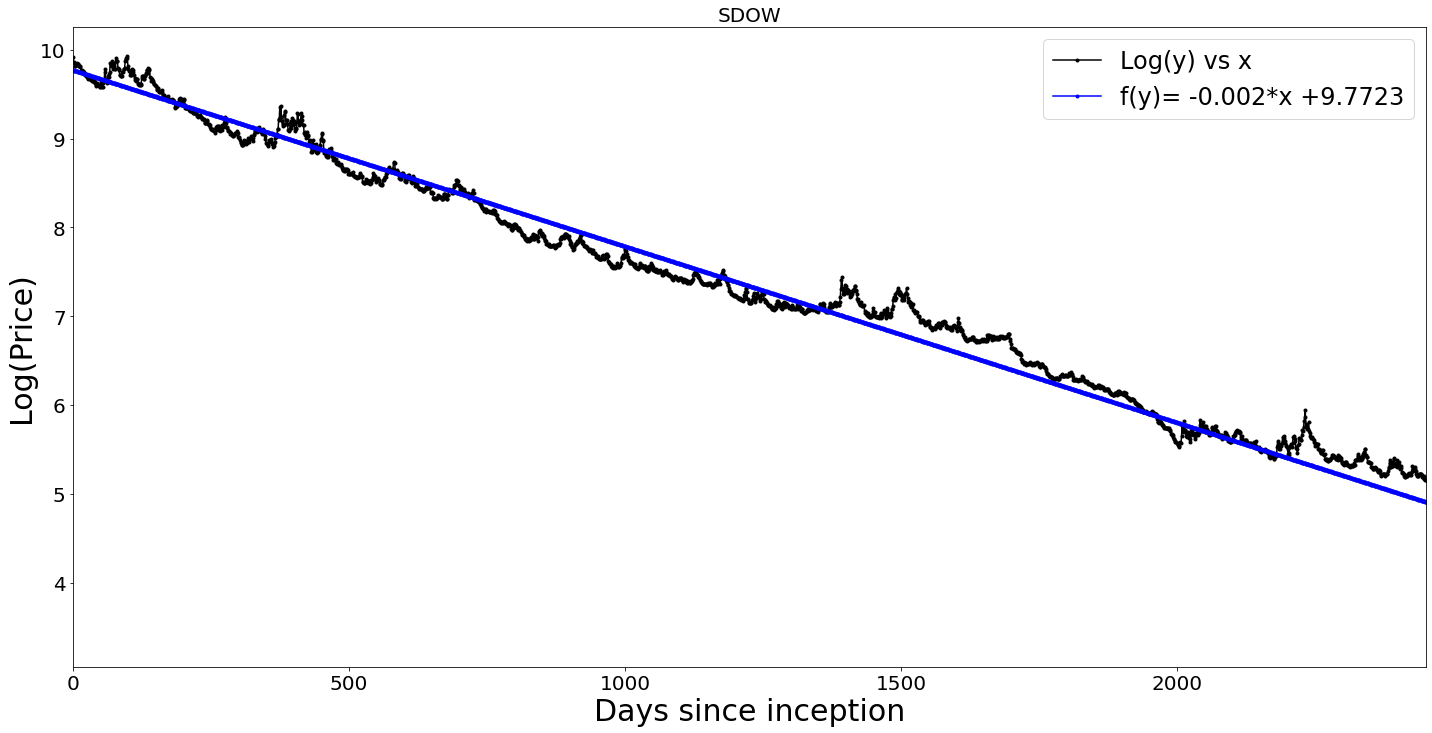

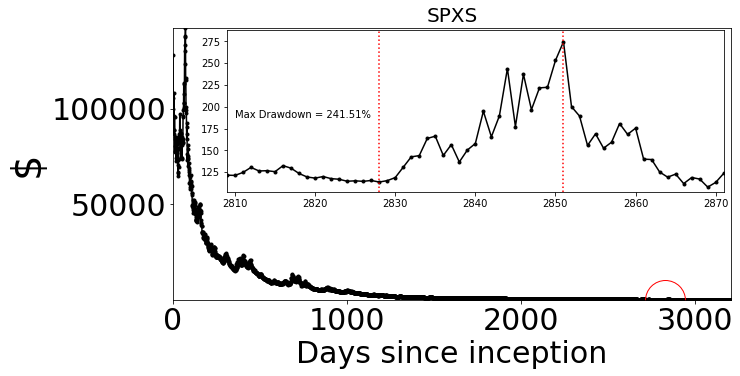

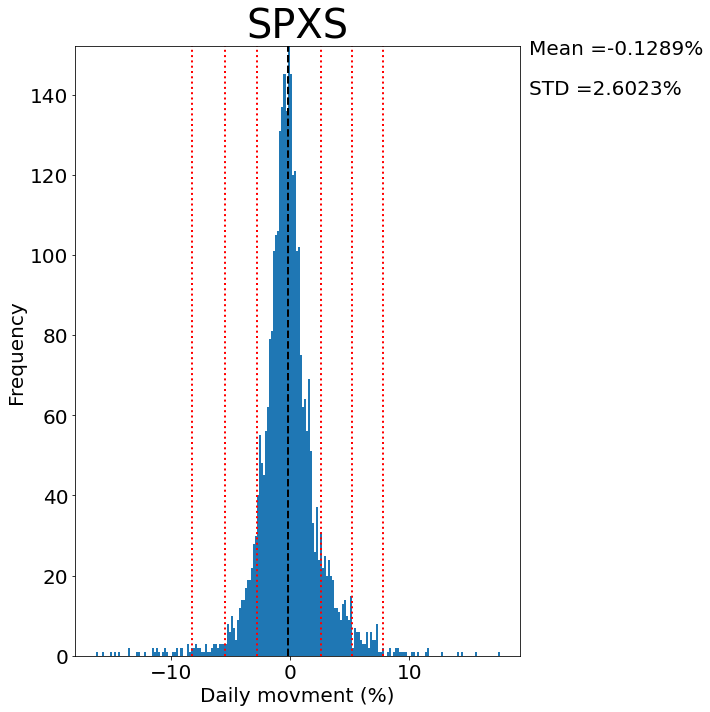

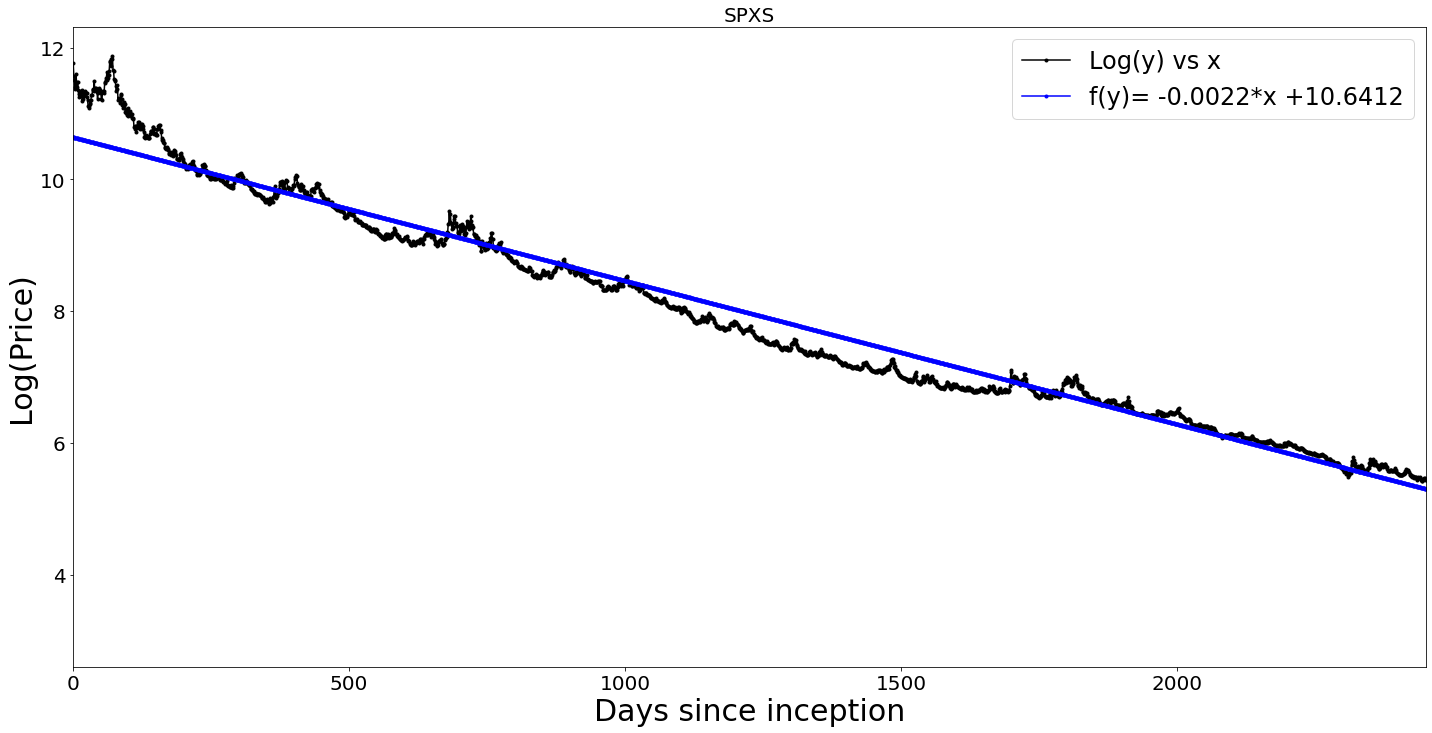

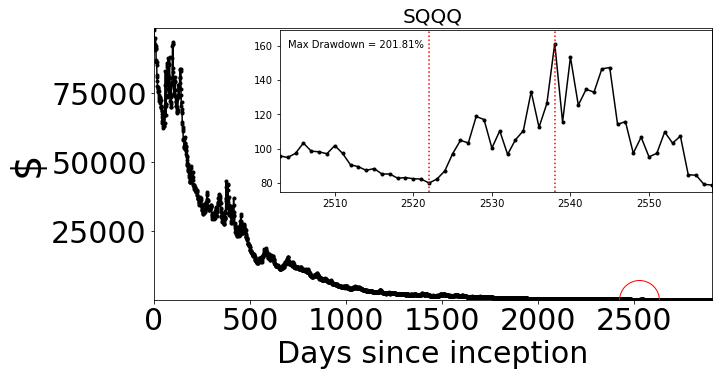

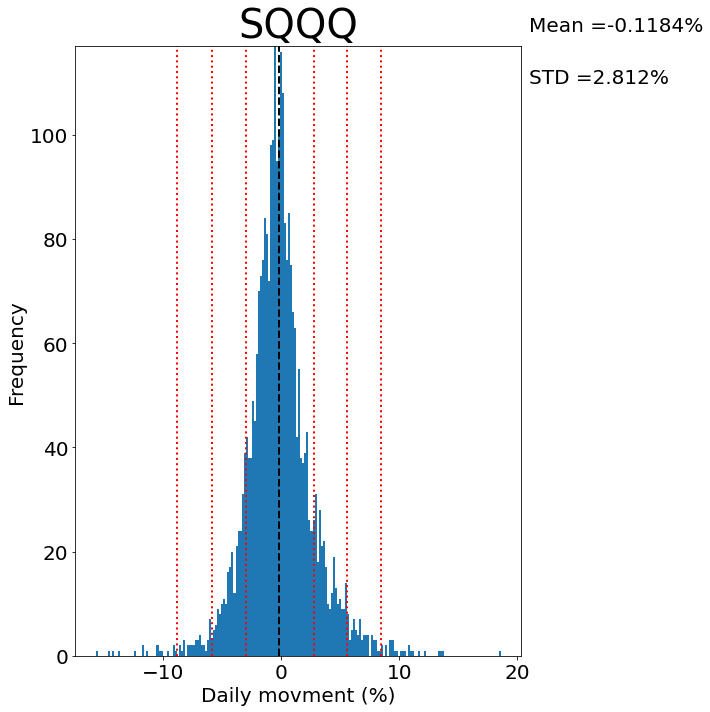

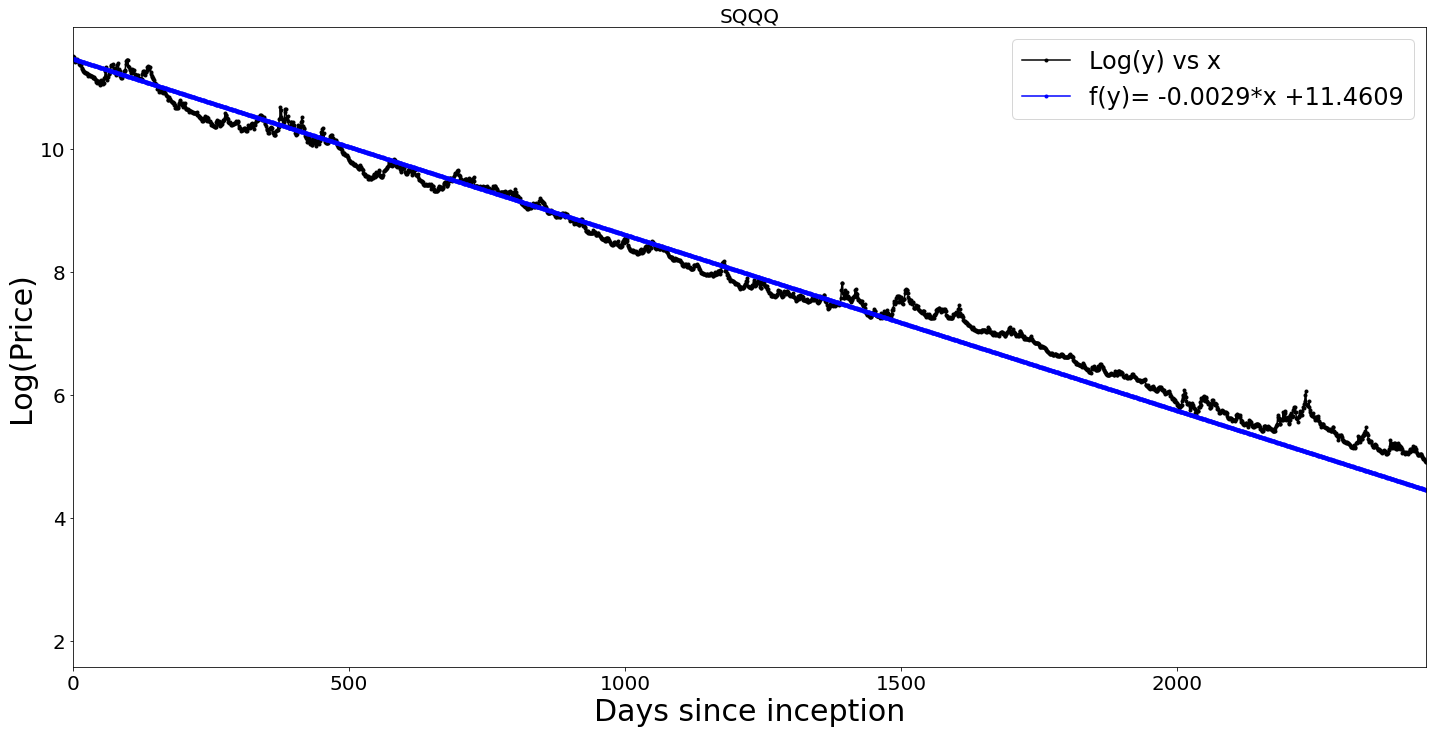

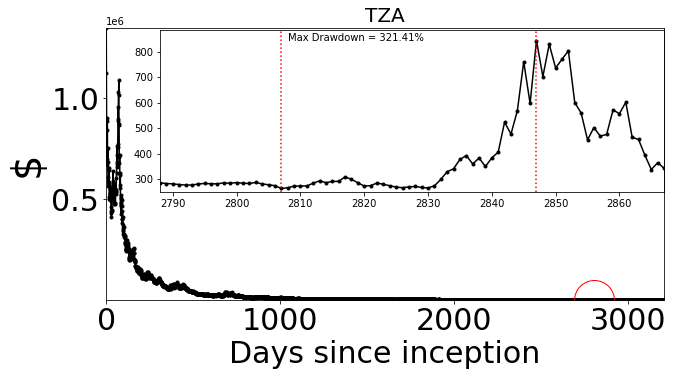

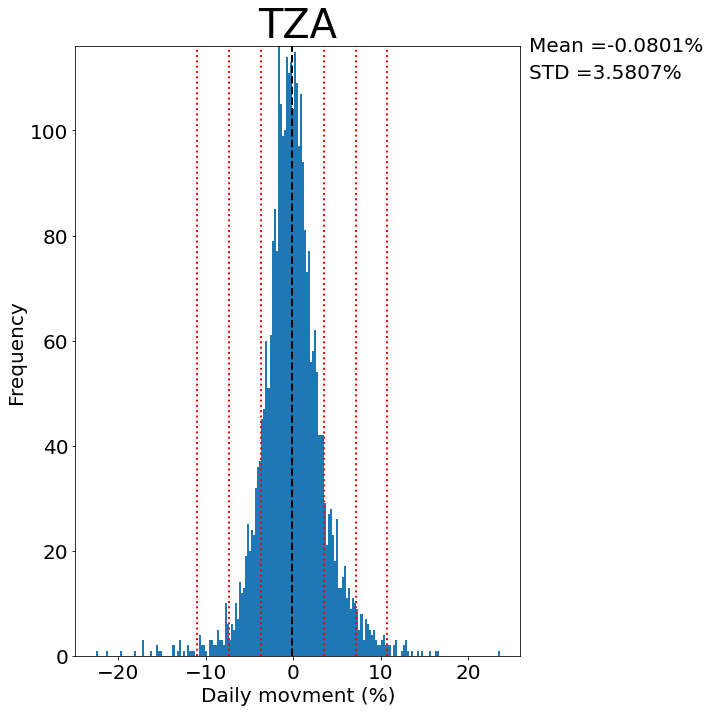

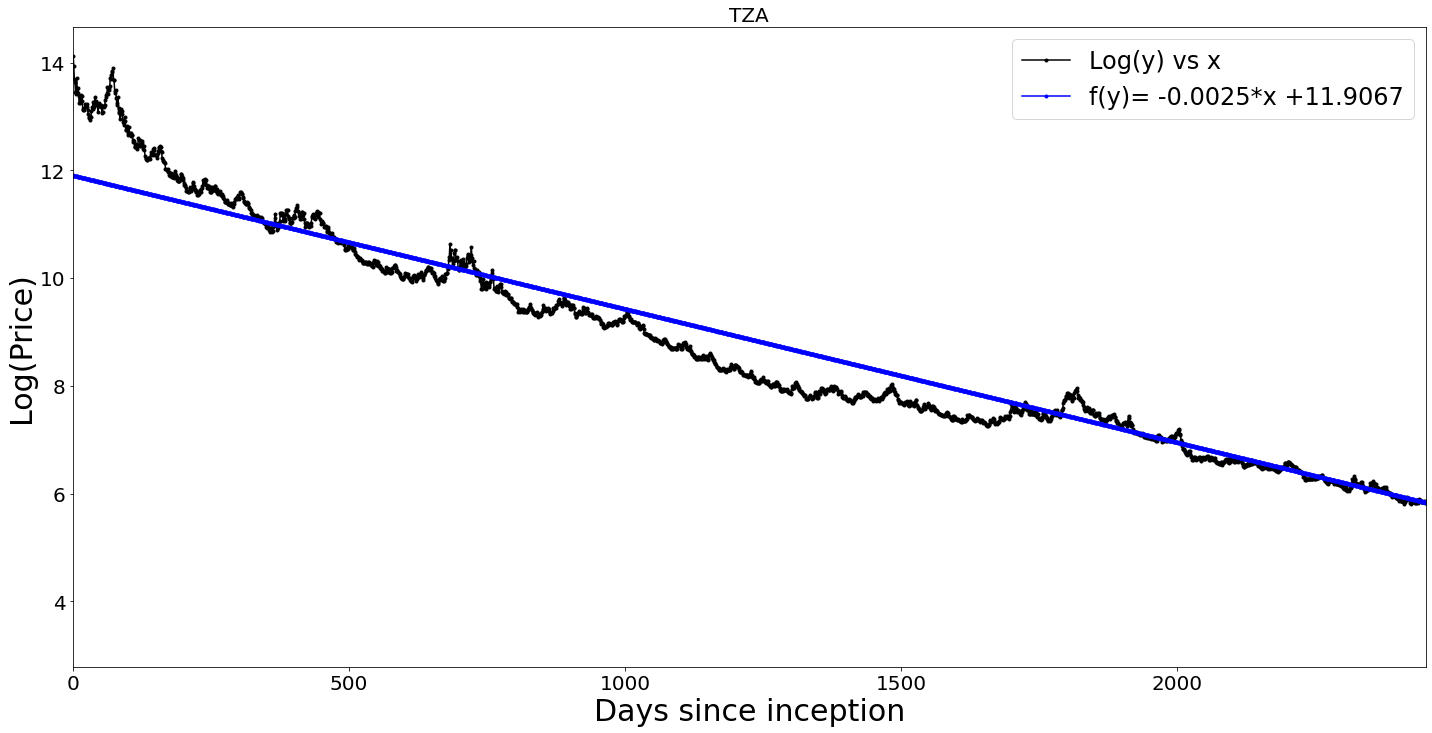

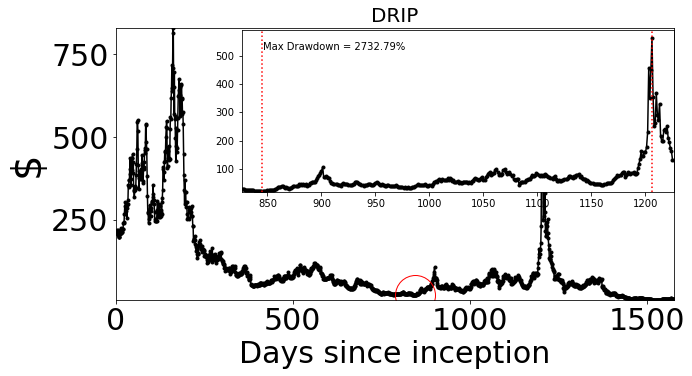

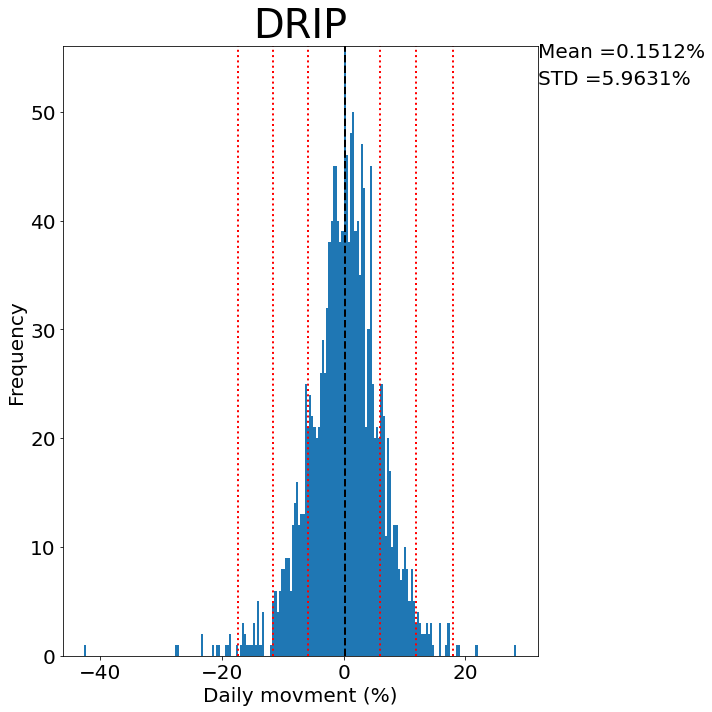

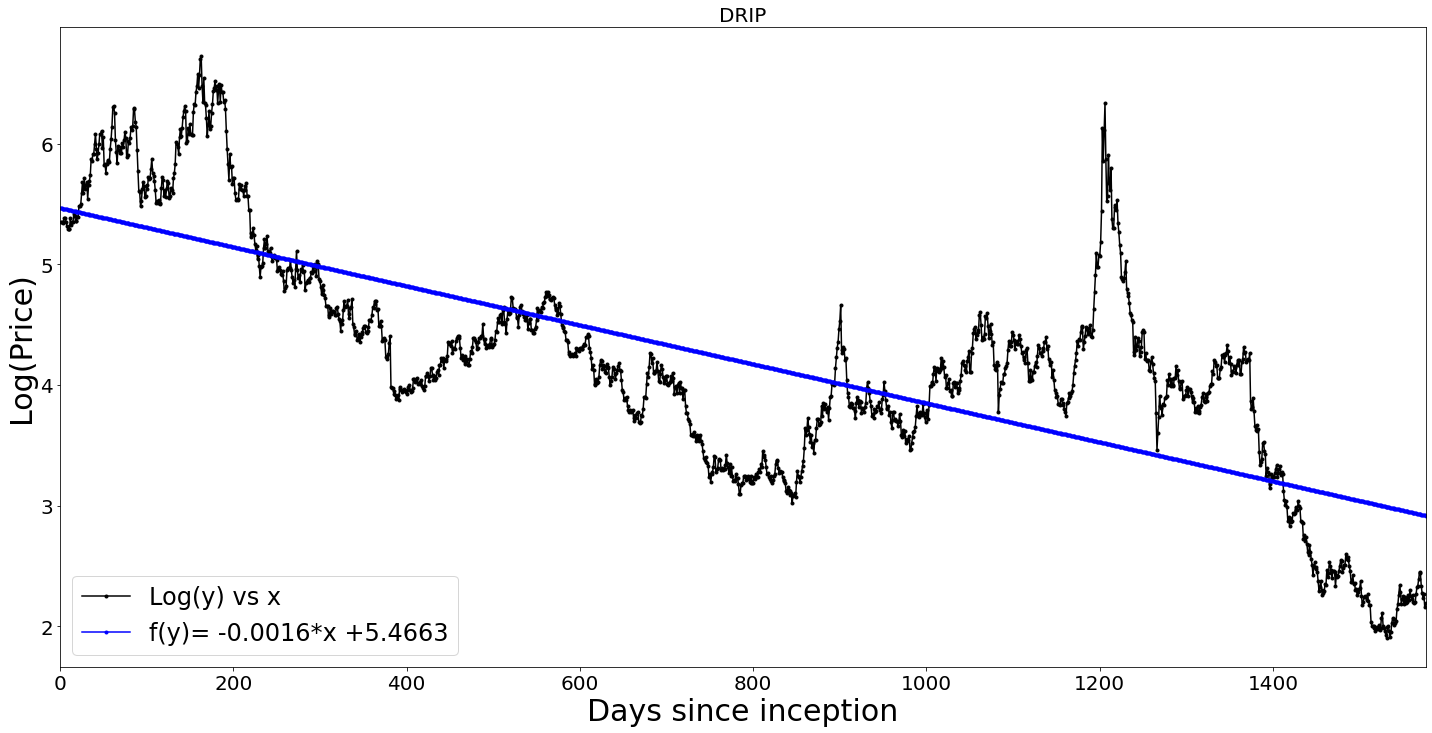

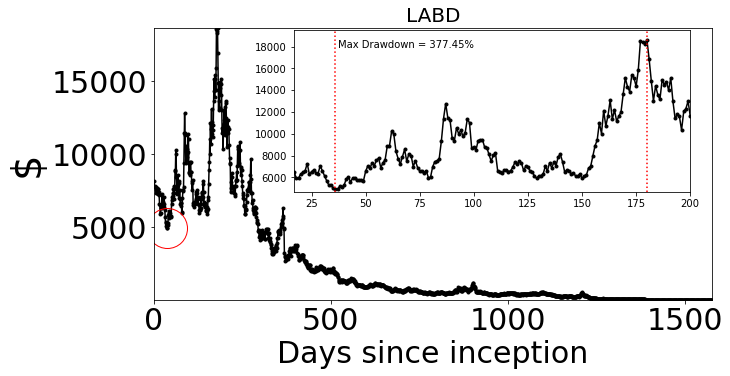

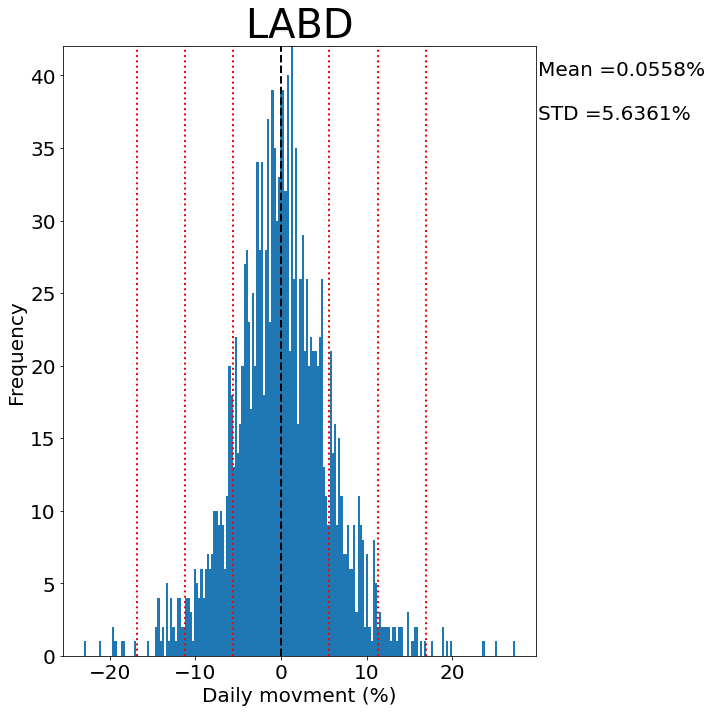

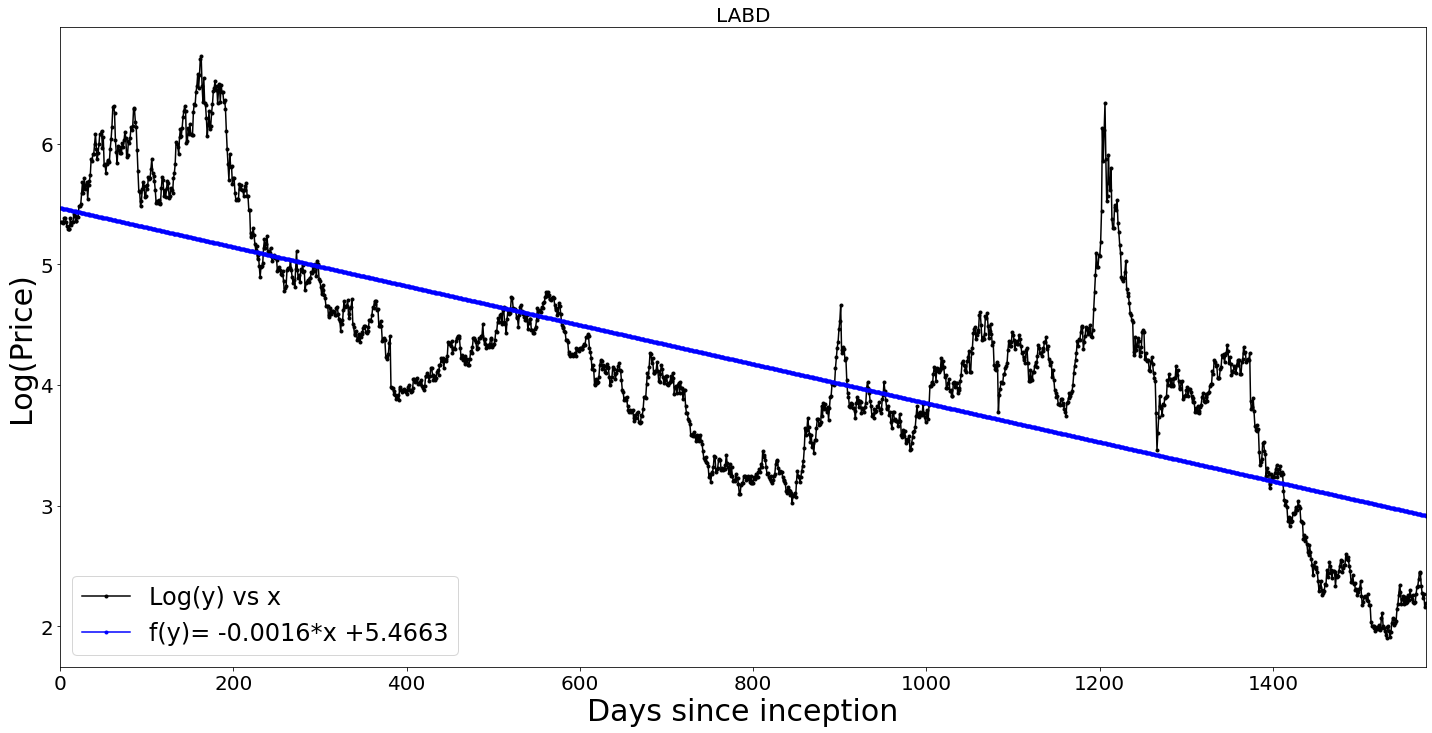

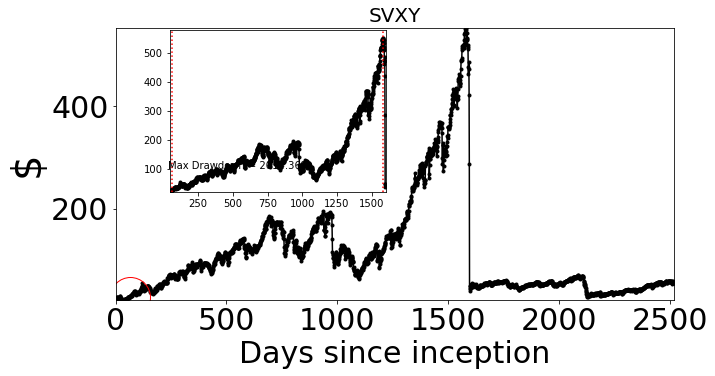

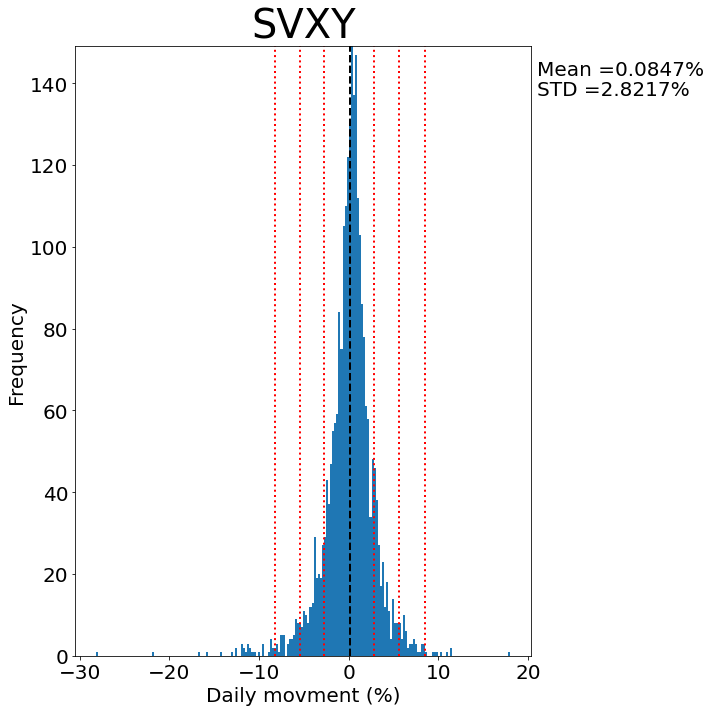

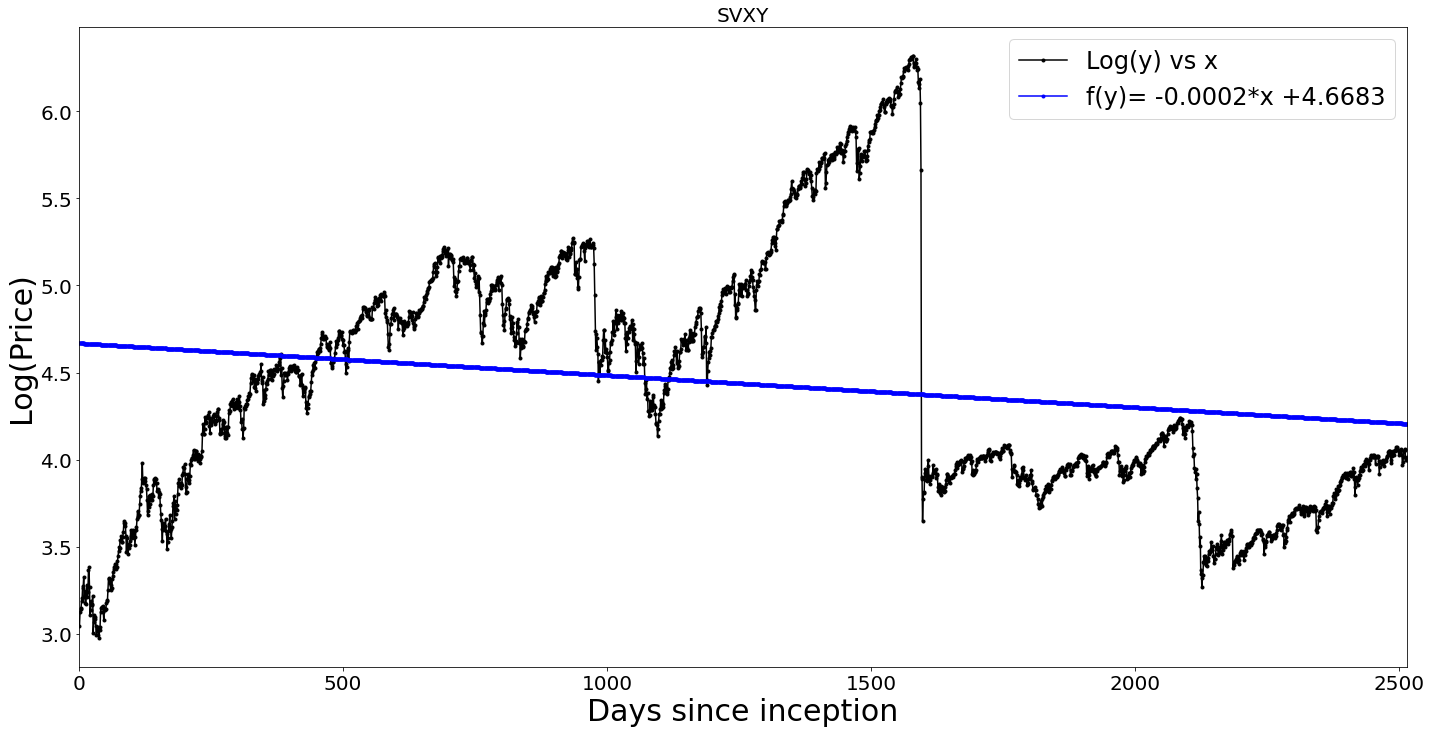

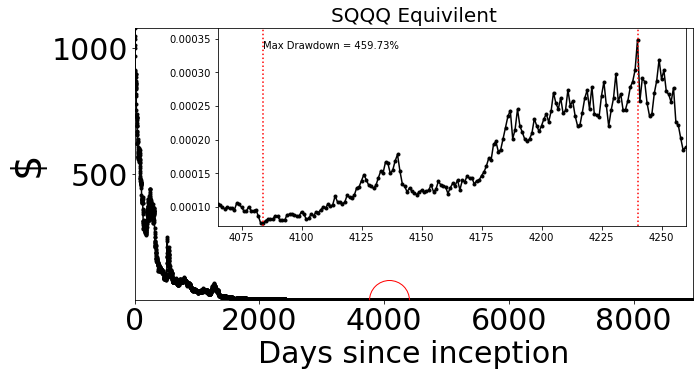

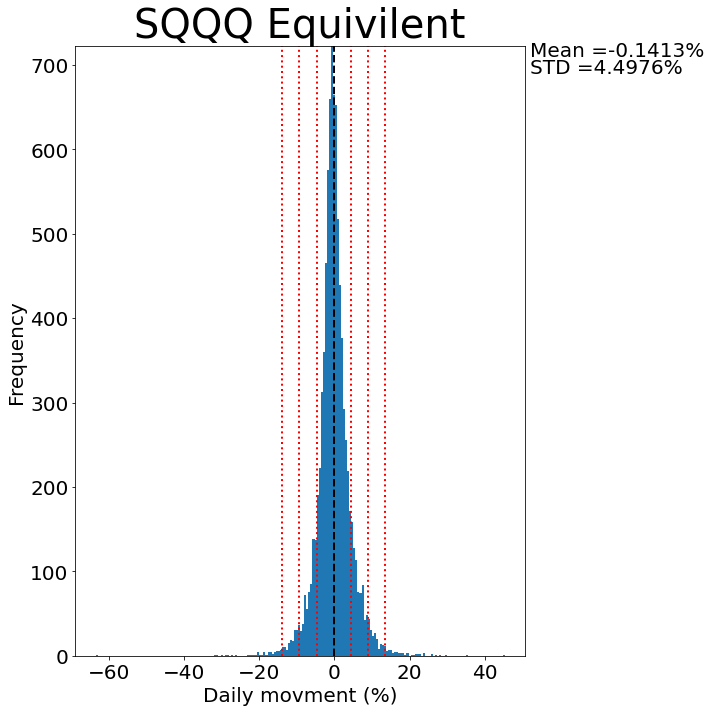

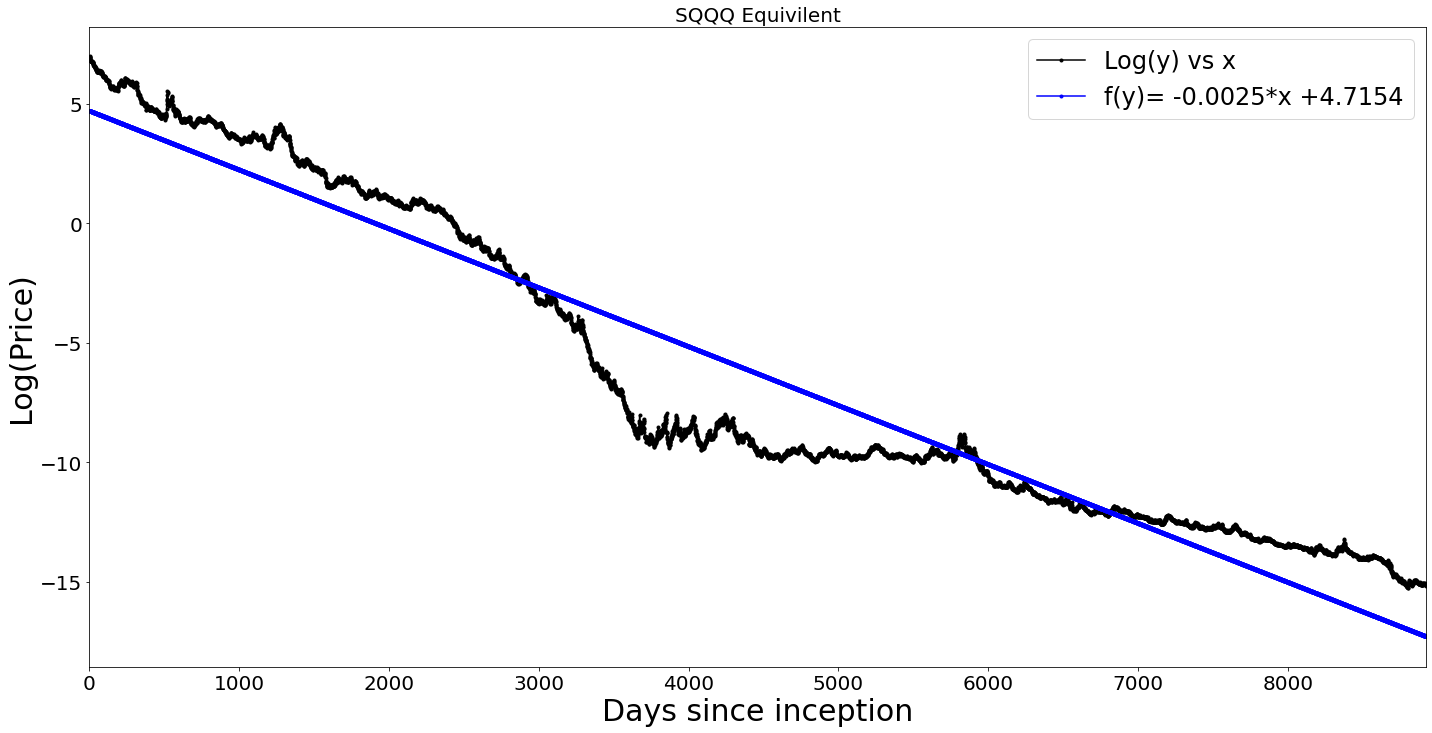

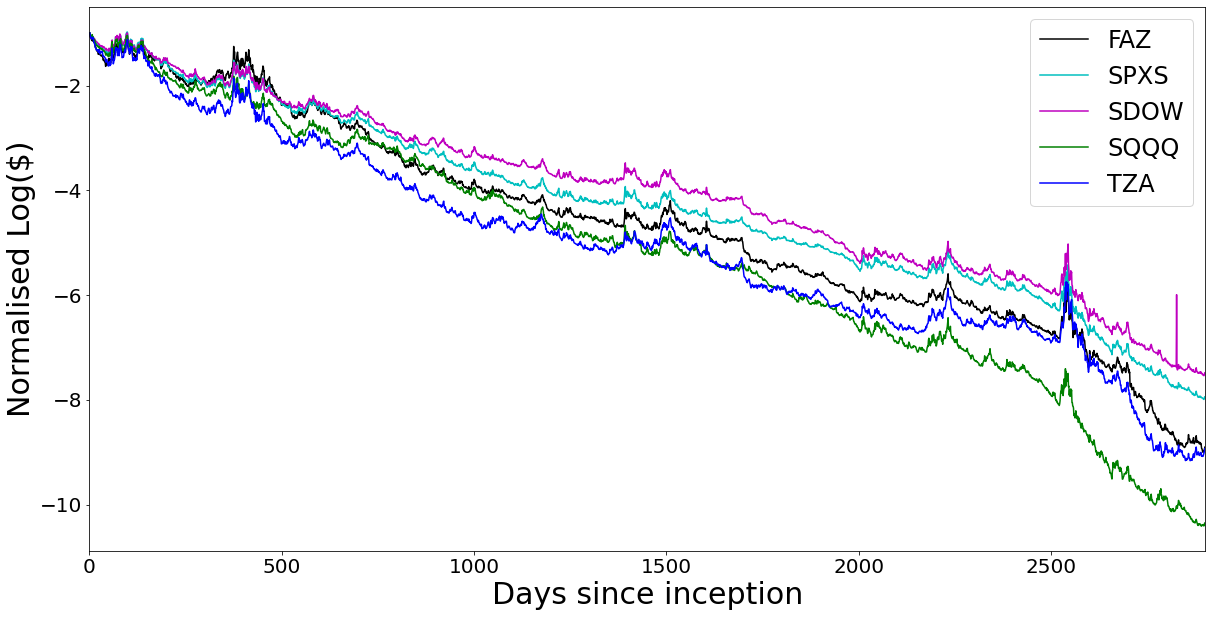

In [6]:

""" TO DO
1) Dates on axis
2) 
"""

# Studies of leveraged short ETF's
import os ; import numpy as np ;import matplotlib.pyplot as plt ; from scipy import stats
import datetime as dt ; import matplotlib.dates as mdates ; from scipy.stats import norm

# path to data
fp = 'data//main//' ; fp2 = 'data//proxy//'

# Data reader
def getData(fp):
    a= open(fp,'r')
    data=a.readlines()
    a.close()

    op,cp,date,index,percent,logCP = [],[],[],[],[],[]
    c=-1
    for line in data:
        c+=1
        if c ==0:#       # Skip header
            pass
        else:
            var=line.split(',')
            percent.append((float(var[4])/float(var[1])))     #Calculate percentage change from open to close
            index.append(c)
            date.append(var[0])
            op.append(float(var[1]))
            cp.append(float(var[4]))
            logCP.append(np.log(float(var[4])))
    index=np.array(index); op=np.array(op)
    cp=np.array(cp); logCP=np.array(logCP); percent=np.array(percent)
    return index, date, op, cp, percent, logCP

# Get data sets
FAZindex, FAZdate, FAZop, FAZcp, FAZpercent, FAZlog = getData(fp+'FAZ.csv')
SDOWindex, SDOWdate, SDOWop, SDOWcp, SDOWpercent, SDOWlog = getData(fp+'SDOW.csv')
SPXSindex, SPXSdate, SPXSop, SPXScp, SPXSpercent, SPXSlog = getData(fp+'SPXS.csv')
SQQQindex, SQQQdate, SQQQop, SQQQcp, SQQQpercent, SQQQlog = getData(fp+'SQQQ.csv')
TZAindex, TZAdate, TZAop, TZAcp, TZApercent, TZAlog = getData(fp+'TZA.csv')
DRIPindex, DRIPdate, DRIPop, DRIPcp, DRIPpercent, DRIPlog = getData(fp+'DRIP.csv')
LABDindex, LABDdate, LABDop, LABDcp, LABDpercent, LABDlog = getData(fp+'LABD.csv')
SVXYindex, SVXYdate, SVXYop, SVXYcp, SVXYpercent, SVXYlog = getData(fp+'SVXY.csv')
NAZ100index, NAZ100date, NAZ100op, NAZ100cp, NAZ100percent, NAZ100log = getData(fp2+'NDX.csv')
DUSTindex, DUSTdate, DUSTop, DUSTcp, DUSTpercent, DUSTlog = getData(fp+'DUST.csv')
JDSTindex, JDSTdate, JDSTop, JDSTcp, JDSTpercent, JDSTlog = getData(fp+'JDST.csv')

def largestDrawDown(index, cp):
# find worst possible drawdown:
    drawDowns=[]
    for i in range(len(index)):

        if i == (len(index)-1):
            break
        else:
            v1=cp[i]  ; loss=True ; count = i ; DD=0. ; top=0
            while loss:
                try:
                    count+=1
                    v2=cp[count]
                    if v2<v1:
                        drawDowns.append([DD,i+1,count,top+1])
                        loss=False
                    else:
                        var= 100.*(v2/v1)
                        if var>DD:
                            DD=var
                            top=count
                        else:
                            pass
                except:
                    loss=False


    orderedDD=sorted(drawDowns,key = lambda x:x[0])
    return orderedDD

starting=1000.
sqe, sqePercent = [], [] 
for i in range(len(NAZ100op)):
    if i == 0:
        sqe.append(starting)
        sqePercent.append(1.)

    else:
        yDay=sqe[i-1]
        tDay=yDay*(3.*(1.-NAZ100percent[i])+1.)
        sqePercent.append((3.*(1.-NAZ100percent[i])+1.))
        sqe.append(tDay)
        
sqe = np.array(sqe) ; sqeLog = np.log(sqe)
sqePercent=np.array(sqePercent)

# Calculate all possible drawdowns
FAZDD = largestDrawDown(FAZindex, FAZcp)
SDOWDD = largestDrawDown(SDOWindex, SDOWcp)
SPXSDD = largestDrawDown(SPXSindex, SPXScp)
SQQQDD = largestDrawDown(SQQQindex, SQQQcp)
TZADD = largestDrawDown(TZAindex, TZAcp)
DRIPDD = largestDrawDown(DRIPindex, DRIPcp)
LABDDD = largestDrawDown(LABDindex, LABDcp)
SVXYDD = largestDrawDown(SVXYindex, SVXYcp)
SQQQDDEquiv = largestDrawDown(NAZ100index,sqe)
DUSTDD = largestDrawDown(DUSTindex, DUSTcp)
JDSTDD = largestDrawDown(JDSTindex, JDSTcp)

def Insetplotter(x,y,name,DD,percentSet,xshift,yshift,left,bottom,width,height,loc1,loc2):
    #Plot price against time
    plt.figure(1,[10,5])
    DDstart = DD[-1][1] ; DDend = DD[-1][2]
    plt.plot(x,y,'k.-')
    #plt.scatter(DDstart,y[DDstart],s=20, facecolors='none', edgecolors='r')
    plt.plot(DDstart,y[DDstart],'ro',markersize=40,fillstyle='none')
    #plt.arrow(1500,15000,750,-11500,color='r')
    plt.axis([0, len(x), 1.1*np.amin(y), np.amax(y)])
    plt.tick_params(axis='both', which='major', labelsize=30)
    plt.xlabel('Days since inception',fontsize=30)
    plt.ylabel('$',fontsize=40)
    plt.xlim(0.,len(x))
    
    plt.title(name,fontsize=20)
     
    #Plot inset of logged version with fit line
    DDstart = DD[-1][1] ; DDend = DD[-1][-1]
    xx=x[DDstart-20:DDend+20] ; yy=y[DDstart-20:DDend+20]
    a= plt.axes([0.2+left,0.25+bottom,0.7+width,0.55+height])    # [left,bottom,width,height]
    plt.plot(xx,yy,'k.-')
    
    plt.plot([DDstart,DDstart],[np.amin(yy)*0.95,np.amax(yy)*1.05],'r:')
    plt.plot([DDend,DDend],[np.amin(yy)*0.95,np.amax(yy)*1.05],'r:')
    plt.ylim(np.amin(yy)*0.95,np.amax(yy)*1.05)
    plt.xlim(xx[0],xx[-1])
    l1='Max Drawdown = '+str(round(DD[-1][0],2))+'%'
    plt.text(DDstart+xshift,np.amin(yy)+yshift,l1,fontsize=10)
    plt.savefig('plots//'+'DD '+name+'.png',bbox_inches="tight")
    #plt.tight_layout()
    plt.show()
    
    def distributionPlot(percentSet,name,loc1,loc2):
        # Histogram of daily percentage movments
        percentSet=(percentSet-1.)*100.
        #Plot params
        fig= plt.figure(1,[10,10])
        ax = fig.add_subplot(1, 1, 1)
        ax.tick_params(axis='both', which='major', labelsize=20)
        var= ax.hist(percentSet,bins=200)
        plotHeight=sorted(var[0])
        plotWidth=sorted(var[1])
        plt.xlabel('Daily movment (%)',fontsize=20)
        plt.ylabel('Frequency',fontsize=20)
        plt.ylim(plotHeight[0],plotHeight[-1])
        plt.title(name,fontsize=40)
        # Stats
        mean,std=norm.fit(percentSet)
        std1=[std,std] ;std2=[2*std,2*std];std3=[3*std,3*std]
        Nstd1=[(-std+mean),(-std+mean)] ;Nstd2=[2*(-std+mean),2*(-std+mean)];Nstd3=[3*(-std+mean),3*(-std+mean)]
        aveX=[mean,mean]; aveY=[0,plotHeight[-1]+5]
        #plot and save
        plt.plot(aveX,aveY,'k--',linewidth=2)
        plt.plot(std1,aveY,'r:',linewidth=2)
        plt.plot(std2,aveY,'r:',linewidth=2)
        plt.plot(std3,aveY,'r:',linewidth=2)
        plt.plot(Nstd1,aveY,'r:',linewidth=2)
        plt.plot(Nstd2,aveY,'r:',linewidth=2)
        plt.plot(Nstd3,aveY,'r:',linewidth=2)
        m='Mean ='+str(round(mean,4))+'%'
        s='STD ='+str(round(std,4))+'%'
        plt.text(loc1[0],loc1[1],m,fontsize=20)
        plt.tight_layout()
        plt.text(loc2[0],loc2[1],s,fontsize=20)
        plt.savefig('plots//'+name+'Distribution'+'.png',bbox_inches="tight")
        plt.show()
        
    distributionPlot(percentSet,name,loc1,loc2)

    
def logPlot(x,y,name,xlim):

    fig= plt.figure(5,[20,10])
    ax = fig.add_subplot(1, 1, 1)
    #plt.plot(x,y,'b.-')
    #lx=np.log10(cp)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

    string1='f(y)= '+str(round(slope,4))+'*x'+' +'+str(round(intercept,4))
    xFit=np.linspace(0,len(x),num=len(x))
    yFit=slope*xFit+intercept
    ax.plot(x,y,'k.-',label='Log(y) vs x')
    ax.plot(xFit,yFit,'b.-',label=string1)
    plt.legend(prop={'size': 24})
    ax.set_xlim(0,xlim)
    ax.tick_params(axis='both', which='major', labelsize=20)
    plt.xlabel('Days since inception',fontsize=30)
    plt.ylabel('Log(Price)',fontsize=30)
    plt.tight_layout()
    plt.title(name,fontsize=20)
    plt.savefig('plots//'+'log'+name+'.png',bbox_inches="tight")
    plt.show()
    

# Build plots
# args format (x,y,name,DD,percentSet,xshift,yshift,left,bottom,width,height,loc1,loc2)

Insetplotter(JDSTindex,JDSTcp,'JDST',JDSTDD,JDSTpercent,0,0,0.25,0.33,-0.25,-0.25,[0,0],[0,0])
logPlot(JDSTindex,JDSTlog,'JDST',2450)

Insetplotter(DUSTindex,DUSTcp,'DUST',DUSTDD,DUSTpercent,0,80000,0.25,0.33,-0.25,-0.25,[0,0],[0,0])
logPlot(DUSTindex,DUSTlog,'DUST',2450)

Insetplotter(FAZindex,FAZcp,'FAZ',FAZDD,FAZpercent,-18,80,0.0,0.175,0.0,-0.1,[32,210],[32,200])
logPlot(FAZindex,FAZlog,'FAZ',2450)

Insetplotter(SDOWindex,SDOWcp,'SDOW',SDOWDD,SDOWpercent,-18,80,0.1,0.175,-0.1,-0.1,[20,160],[20,150])
logPlot(SDOWindex,SDOWlog,'SDOW',2450)

Insetplotter(SPXSindex,SPXScp,'SPXS',SPXSDD,SPXSpercent,-18,80,0.,0.175,-0.01,-0.1,[20,150],[20,140])
logPlot(SPXSindex,SPXSlog,'SPXS',2450)

Insetplotter(SQQQindex,SQQQcp,'SQQQ',SQQQDD,SQQQpercent,-18,80,0.1,0.175,-0.1,-0.1,[21,120],[21,110])
logPlot(SQQQindex,SQQQlog,'SQQQ',2450)

Insetplotter(TZAindex,TZAcp,'TZA',TZADD,TZApercent,1,580,0.0,0.175,0.0,-0.1,[27,115],[27,110])
logPlot(TZAindex,TZAlog,'TZA',2450)

Insetplotter(DRIPindex,DRIPcp,'DRIP',DRIPDD,DRIPpercent,1,500,0.1,0.175,-0.1,-0.1,[32,55],[32,52.5])
logPlot(DRIPindex,DRIPlog,'DRIP',DRIPindex[-1])

Insetplotter(LABDindex,LABDcp,'LABD',LABDDD,LABDpercent,1,13000,0.12,0.175,-0.15,-0.1,[30,40],[30,37])
logPlot(DRIPindex,DRIPlog,'LABD',DRIPindex[-1])

Insetplotter(SVXYindex,SVXYcp,'SVXY',SVXYDD,SVXYpercent,-30,80,0,0.175,-0.4,-0.1,[21,142],[21,137])
logPlot(SVXYindex,SVXYlog,'SVXY',SVXYindex[-1])

Insetplotter(NAZ100index,sqe,'SQQQ Equivilent',SQQQDDEquiv,sqePercent,0.0001,0.00026,0.04,0.08,-0.05,0,[52,710],[52,690])
logPlot(NAZ100index,sqeLog,'SQQQ Equivilent',8920)



# get sycronised start date data:
folder='commonStartDate//'
FAZindexS, FAZdateS, FAZopS, FAZcpS, FAZpercentS, FAZlogS = getData(fp+folder+'FAZ.csv')
SDOWindexS, SDOWdateS, SDOWopS, SDOWcpS, SDOWpercentS, SDOWlogS = getData(fp+folder+'SDOW.csv')
SPXSindexS, SPXSdateS, SPXSopS, SPXScpS, SPXSpercentS, SPXSlogS = getData(fp+folder+'SPXS.csv')
SQQQindexS, SQQQdateS, SQQQopS, SQQQcpS, SQQQpercentS, SQQQlogS = getData(fp+folder+'SQQQ.csv')
TZAindexS, TZAdateS, TZAopS, TZAcpS, TZApercentS, TZAlogS = getData(fp+folder+'TZA.csv')

# normalise to start at zero to make direct comparison over assets
def normalise(someArray):
    return someArray - (someArray[0]+1.)

FAZlogNormed=normalise(FAZlogS) ; SPXSlogNormed=normalise(SPXSlogS) ; SDOWlogNormed=normalise(SDOWlogS)
SQQQlogNormed=normalise(SQQQlogS) ; TZAlogNormed=normalise(TZAlogS)

#FAZN=normalise(FAZcpS)

#FAZlogN=np.log(FAZN)#; SPXSlogNormed=np.log(normalise(SPXScpS)) ; SDOWlogNormed=np.log(normalise(SDOWcpS))
#SQQQlogNormed=np.log(normalise(SQQQcpS)) ; TZAlogNormed=np.log(normalise(TZAcpS))

fig= plt.figure(6,[20,10])
ax = fig.add_subplot(1, 1, 1)
plt.plot(FAZindexS,FAZlogNormed,'k-',label='FAZ')
plt.plot(SPXSindexS,SPXSlogNormed,'c-',label='SPXS')
plt.plot(SDOWindexS,SDOWlogNormed,'m-',label='SDOW')
plt.plot(SQQQindexS,SQQQlogNormed,'g-',label='SQQQ')
plt.plot(TZAindexS,TZAlogNormed,'b-',label='TZA')
plt.legend(prop={'size': 24})
ax.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Days since inception',fontsize=30)
plt.xlim(0.,FAZindexS[-1])
plt.ylabel('Normalised Log($)',fontsize=30)
plt.savefig('plots//'+'logNorm'+'comparison'+'.png')
plt.show()

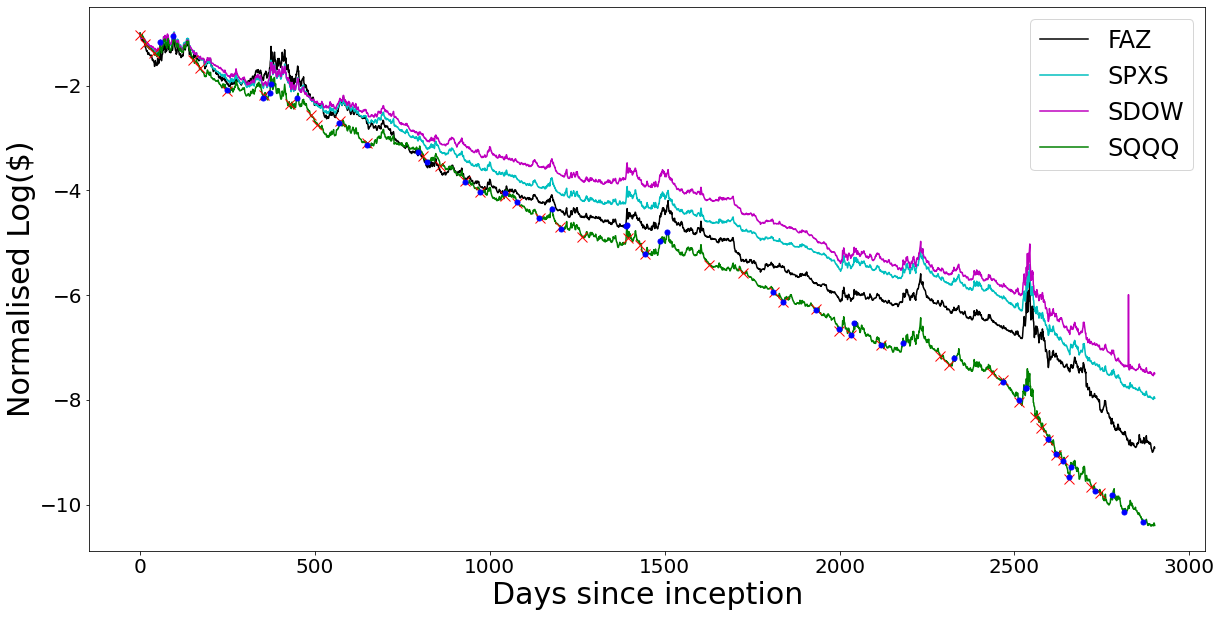

In [3]:

def test(time,price,capital):
    count=-1 ;history=[] #global history
    
    def updateStops(listOfPositions,currentPrice,SLpercent):     #calculate/update trailing stop loss
        for position in listOfPositions:
            if position[-1]>=1.15:
                var=round(currentPrice*SLpercent,2)
                position[2]=var
        return listOfPositions
    
    def updatePLs(listOfPositions,currentPrice):                #calculate/update trailing profit/loss
        for position in listOfPositions:
            PL =round(1.+(1.- (currentPrice/position[1])),5)
            position[-1]=PL
        return listOfPositions
    
    def shutPosition(listOfPositions,currentPrice,currentIndex):         # check if need to shut position
        checked=[]
        for trade in listOfPositions:                                             
            if currentPrice>=trade[2] and trade[2]!=0.:     # check if stopped out
                trade.append(currentIndex)
                history.append(trade)
                                                            # check if want to close in 50% profit
            elif trade[-1]>1.5:
                trade.append(currentIndex)
                history.append(trade)
            
            else:
                checked.append(trade)
        return checked
    
    def updateDrawdowns(listOfPositions,currentPrice):          # keep track of drawdowns on each trade
        for trade in listOfPositions:
            if currentPrice>trade[3]:
                trade[3] = currentPrice                   # larger drawdown so log
        return listOfPositions
    
    for day in time:                               # iterate over data
        count+=1
        p=price[count]

        if count == 0:                              # is first iteration
            trades=[[day,p,0.,0.,0.]]               # structure [day,openPrice,trailingStop,MaxDrwaDown,PL]
            PL=0.
        else:                                       # update quantitys
            trades = updatePLs(trades,p)
            trades = updateStops(trades,p,1.15)     #if first trade >15% set trailing stops
            trades = shutPosition(trades,p,count)
            trades = updateDrawdowns(trades,p)

        if len(trades)==1:                          #one trade open, check if want to open second
            if trades[0][-1] >= 1.15:               # if first +15% then open second
                secondPosition=[day,p,0.,0.,0.]
                trades.append(secondPosition)
      
        elif len(trades)==2:                        #two trades open, check if want to open third
            if trades[1][-1]>=1.15:                 # if second +15% then open third
                thirdPosition=[day,p,0.,0.,0.]       
                trades.append(thirdPosition)          
            
        else:
            if len(trades)==0:                       # should never execute
                print('Error, empty trade list')    

    return history 

BackTestSQQQ=test(SQQQindex,SQQQcp,1000)
BackTestTZA=test(TZAindex,TZAcp,1000)
BackTestFAZ=test(FAZindex,FAZcp,1000)
BackTestSPXS=test(SPXSindex,SPXScp,1000)
BackTestSDOW=test(SDOWindex,SDOWcp,1000)

def historyToFile(history,name):
    header['Open index','Open price','final Stop',]
    fp = 'records//'
    a=open(fp+name,'w')
    for line in history:
        a.write(str(line))
        a.write('\n')
    a.close()

historyToFile(BackTestSQQQ,'BackTestSQQQ.txt')


def positionExtraction(history):
    xO,xC,yO,yC = [],[],[],[]
    def yLoc(position):
        return (2.-position[-2])*position[1]
    for trade in history:
        xO.append(trade[0]) ; xC.append(trade[-1])
        yO.append(trade[1]); yC.append(yLoc(trade))
    xO=np.array(xO) ; yO=np.array(yO)
    xC=np.array(xC) ; yC=np.array(yC)
    return xO, xC

def getPositions(someArray,otherArray):
    yy=[]
    for i in someArray:
        yy.append(otherArray[i])
    yy=np.array(yy)
    return yy

xOSQQQ, xCSQQQ = positionExtraction(BackTestSQQQ)
yOSQQQ = getPositions(xOSQQQ,SQQQlogNormed) ; yCSQQQ = getPositions(xCSQQQ,SQQQlogNormed)

xOTZA, xCTZA = positionExtraction(BackTestTZA)
#yOTZA = getPositions(xOTZA,TZAlogNormed) 
#yCTZA = getPositions(xCTZA,TZAlogNormed)
#yy=[]
#for i in xOSQQQ:
#    yy.append(SQQQlogNormed[i])

#yy=np.array(yy)
#yOSQQQ = normalise2(np.log(yOSQQQ)) ; yCSQQQ = normalise2(np.log(yCSQQQ))
#xOTZA, xCTZA, yOTZA, yCTZA = positionExtraction(BackTestTZA)
#xOFAZ, xCFAZ, yOFAZ, yCFAZ = positionExtraction(BackTestFAZ)
#xOSPXS, xCSPXS, yOSPXS, yCSPXS = positionExtraction(BackTestSPXS)
#xOSDOW, xCSDOW, yOSDOW, yCSDOW = positionExtraction(BackTestSDOW)

fig= plt.figure(6,[20,10])
ax = fig.add_subplot(1, 1, 1)
plt.plot(FAZindexS,FAZlogNormed,'k-',label='FAZ')
plt.plot(SPXSindexS,SPXSlogNormed,'c-',label='SPXS')
plt.plot(SDOWindexS,SDOWlogNormed,'m-',label='SDOW')
plt.plot(SQQQindexS,SQQQlogNormed,'g-',label='SQQQ')
#xOSQQQ, xCSQQQ, yOSQQQ, yCSQQQ
plt.plot(xOSQQQ,yOSQQQ,'rx',markersize=10) ; plt.plot(xCSQQQ,yCSQQQ,'b.',markersize=10)
#plt.plot(xOTZA,yOTZA,'rx',markersize=10) ; plt.plot(xCTZA,yCTZA,'b.',markersize=10)
#plt.plot(xCSQQQ,yCSQQQ,'bo')

#plt.plot(TZAindexS,TZAlogNormed,'b-',label='TZA')
plt.legend(prop={'size': 24})
ax.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Days since inception',fontsize=30)
#plt.xlim(0.,FAZindexS[-1])
plt.ylabel('Normalised Log($)',fontsize=30)
#plt.savefig('plots//'+'logNorm'+'comparison'+'.png')
plt.show()


In [ ]:
def positionExtraction(history):
    xO,xC,yO,yC = [],[],[],[]
    def yLoc(position):
        #print(position)
        return (2.-position[-2])*position[1]
    for trade in history:
        xO.append(trade[0]) ; xC.append(trade[-1])
        yO.append(trade[1]); yC.append(yLoc(trade))
    xO=np.array(xO) ; yO=np.array(yO)
    xC=np.array(xC) ; yC=np.array(yC)
    return xO, xC, yO,yC



"""
print(BackTestSQQQ[0])
print('open day =',BackTestSQQQ[0][0])
print('open price =',BackTestSQQQ[0][1])
print('\n')
vv= (2.-BackTestSQQQ[0][-2])*BackTestSQQQ[0][1]
print('close price =',vv)
print('close day =',BackTestSQQQ[0][-1])
"""

#print(BackTestSQQQ[0])
xOSQQQ, xCSQQQ, yOSQQQ, yCSQQQ = positionExtraction(BackTestSQQQ)

In [ ]:
print('sdow begining = ',FAZcpS[0])
print('sdow end = ',FAZcpS[-1])
print((1.-(FAZcpS[-1]/FAZcpS[0]))*100.)
print('\n')


print('spxs begining = ',SPXScpS[0])
print('spxs end = ',SPXSlogS[-1])
print((1.-(SPXSlogS[-1]/SPXSlogS[0]))*100.)
print('\n')
print('faz begining = ',FAZlogNormed[0])
print('FAZ end = ',FAZlogNormed[-1])
print((1.-(FAZcpS[-1]/FAZcpS[0]))*100.)
print('\n')
print('TZA begining = ',TZAlogNormed[0])
print('TZA end = ',TZAlogNormed[-1])
print((1.-(FAZcpS[-1]/FAZcpS[0]))*100.)
print('\n')
print('SQQQ begining = ',SQQQlogNormed[0])
print('SQQQ end = ',SQQQlogNormed[-1])
print((1.-(FAZcpS[-1]/FAZcpS[0]))*100.)
print('\n')
#

def decayConversion(number1,number2):
    var1=np.sqrt(number1**2)
    print(var1)
    var2=np.sqrt(number2**2)
    print(var2)
    decay=var1/var2
    return decay
v=decayConversion(SDOWlogNormed[0],SDOWlogNormed[-1])
print(v)

fp = 'data//proxy//'
NASindex, NASdate, NASop, NAScp, NASpercent, NASlog = getData(fp+'NDX.csv')
startPoint =  NASop[0]
SQQQEquivilent=[1./startPoint]

counter=-1
SQQQcount=[counter]
for price in NASpercent:
    counter+=1
    newPrice = 3./price
    SQQQEquivilent.append(newPrice)
    SQQQcount.append(counter)
    

SQQQEquivilent = np.array(SQQQEquivilent)
SQQQcount= np.array(SQQQcount)

plt.plot(NASindex,NAScp,'k.')
plt.show()

plt.plot(SQQQcount,SQQQEquivilent,'k.')
plt.show()

for v in SQQQEquivilent:
    print(v)
    
    
# positioning study
days = np.arange(1,366,1)
def decayExample(rate, start, time):
    decay=[] ; multiplyer = (1.+rate)
    for i in time:
        var = start*multiplyer
        decay.append(var)
        start= var
    return np.array(decay)
        
    
F=decayExample(-0.0025, 100., days)


plt.figure(10,[10,5])
plt.plot(days,F,'k.-')
plt.tick_params(axis='both', which='major', labelsize=30)
plt.xlabel('Days since inception',fontsize=30)
plt.ylabel('$',fontsize=40)

    
plt.title('FAZ',fontsize=20)
plt.show()

print('faz begining = ',F[0])
print('FAZ end = ',round(F[-1],2))
ret=((1.-(F[-1]/F[0]))*100.)
print('Return =',round(ret,2))
